In [286]:
import pandas as pd
%matplotlib inline
holdout=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
import numpy as np

In [287]:
def process_fare(df, cut_points, label_names):
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points, labels = label_names)
    return df

cut_points = [0,12,50,100,1000]
label_names = ["0-12", "12-50", "50-100", "100+"]
    

def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df =pd.concat([df, dummies], axis = 1)
    return df

train = process_fare(train, cut_points, label_names)
holdout =process_fare(holdout, cut_points, label_names)

train = create_dummies(train, "Fare_categories")
holdout = create_dummies(holdout, "Fare_categories") 

In [288]:
def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points, labels = label_names)
    return df

def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df =pd.concat([df, dummies], axis = 1)
    return df

train = process_age(train)
holdout =process_age(holdout)
for column in ["Age_categories", "Pclass", "Sex"]:
    train = create_dummies(train, column)
    holdout = create_dummies(holdout, column) 

In [289]:
from sklearn.preprocessing import minmax_scale
holdout["Fare"] = holdout["Fare"].fillna(train["Fare"].mean())
columns =["SibSp", "Parch", "Fare"]

holdout["Embarked"] = holdout["Embarked"].fillna(train["Embarked"].mode())
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode())

train = create_dummies(train, "Embarked")
holdout = create_dummies(holdout, "Embarked")

#rescales columns to the range of 1(ie. 0-1)
for col in columns:
    train[col + "_scaled"] = minmax_scale(train[col])
    holdout[col + "_scaled"] = minmax_scale(holdout[col])

In [290]:
train["Name"].iloc[0].split(",")[1].split(".")[0].strip()

'Mr'

In [291]:
def get_title(name):
    if "." in name:
        return name.split(",")[1].split(".")[0].strip()
    else:
        return "unkown"

In [292]:
#generating alist with all the different titles
titles = sorted(set([x for x in train.Name.map(lambda x : get_title(x))]))

In [293]:
titles = sorted(set([x for x in holdout.Name.map(lambda x : get_title(x))]))

In [294]:
train["title"] = train["Name"].map(lambda x: get_title(x))
holdout["title"] = train["Name"].map(lambda x: get_title(x))

In [295]:
def process_title(df):
    df["who"]=np.nan
    for x in range(0,len(df)-1):
        if df["title"][x] in ['Capt','Col','Don','Jonkheer','Major','Master','Mr','Rev','Sir']:
            df["who"][x] = "Mr"
        elif df["title"][x] in ['Mme','Mrs','the Countess']:
            df["who"][x] = "Mrs"
        elif df["title"][x] in ['Ms','Miss','Mlle','Lady']:
            df["who"][x] = 'Miss'
        elif df["title"][x] == 'Dr':
            if df["Sex"][x] == "male":
                df["who"][x] = "Mr"
            else:
                df["who"][x] = "Mrs"
        else:
            df["title"][x]

In [296]:
process_title(train)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning

In [297]:
process_title(holdout)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is tryin

In [298]:
train = create_dummies(train, "who")
holdout = create_dummies(holdout, "who")

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


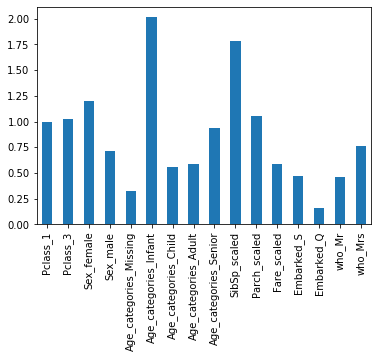

In [308]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


col = ["Pclass_1", "Pclass_2", "Pclass_3", "Sex_female", "Sex_male" , "Age_categories_Missing",
"Age_categories_Infant","Age_categories_Child", "Age_categories_Teenager","Age_categories_Young Adult",
 "Age_categories_Adult", "Age_categories_Senior",  "SibSp_scaled", "Parch_scaled", "Fare_scaled",
 "Embarked_C", "Embarked_S", "Embarked_Q","who_Miss","who_Mr", "who_Mrs"]


lr = LogisticRegression()
lr.fit(train[col],train["Survived"])
# checking which columns are important
coefficients = lr.coef_

feature_importance = pd.Series(coefficients[0], index= train[col].columns)
a = feature_importance.abs()
a.plot.bar()

In [309]:
columns = ["Pclass_1", "Pclass_3", "Sex_female", "Sex_male" , "Age_categories_Infant",
           "Age_categories_Child", "Age_categories_Adult", "Age_categories_Senior","SibSp_scaled", "Parch_scaled",
           "Fare_scaled","Embarked_S","who_Mr", "who_Mrs"]

all_X = train[columns]
all_y = train["Survived"]

from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = np.mean(scores)
accuracy

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

0.8193596073090454

In [306]:
columns = ["Pclass_1", "Pclass_3", "Sex_female", "Sex_male" , "Age_categories_Missing","Age_categories_Infant",
           "Age_categories_Child", "Age_categories_Adult", "Age_categories_Senior","SibSp_scaled", "Parch_scaled",
           "Fare_scaled","Embarked_S", "Embarked_Q","who_Mr", "who_Mrs"]
all_X = train[columns]
all_y = train["Survived"]

lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])
holdout_predictions

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [307]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids, 
                 "Survived" : holdout_predictions}
submission3 = pd.DataFrame(submission_df)
submission3.to_csv("submission_3.csv", index = False)